In [3]:
import pandas as pd
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, r2_score
# fix random seed for reproducibility


import numpy as np
np.random.seed(7)

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import tree
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

train = pd.read_csv('train_data.csv')
test = pd.read_csv('test_data.csv')
train.Building_Painted=train.Building_Painted.map(dict(V=1, N=0))
train.Building_Fenced=train.Building_Fenced.map(dict(V=1, N=0))
train.Garden=train.Garden.map(dict(V=1, O=0))
train.Settlement=train.Settlement.map(dict(U=1, R=0))
train.NumberOfWindows=train.NumberOfWindows.replace({'   .': 0,'>=10':13})

Geo_Code=[]

for index, row in train.iterrows():
    row['Geo_Code']=str(row['Geo_Code']).replace('A','10')
    row['Geo_Code']=str(row['Geo_Code']).replace('B','11')
    #train1.iloc[index]['Geo_Code']=row['Geo_Code']
    #print(row['Geo_Code'])
    Geo_Code.append(row['Geo_Code'])
df_Geo_Code=pd.DataFrame({'Geo_Code':Geo_Code})

train['Geo_Code']=Geo_Code
train=train.dropna()


train_Y=train['Claim']
train_X=train.drop('Claim', 1)
train_X=train_X.drop('Customer Id', 1)

Customer=test['Customer Id']

test.Building_Painted=test.Building_Painted.map(dict(V=1, N=0))
test.Building_Fenced=test.Building_Fenced.map(dict(V=1, N=0))
test.Garden=test.Garden.map(dict(V=1, O=0))
test.Settlement=test.Settlement.map(dict(U=1, R=0))
test.NumberOfWindows=test.NumberOfWindows.replace({'   .': 0,'>=10':13})

Geo_Code=[]

for index, row in test.iterrows():
    row['Geo_Code']=str(row['Geo_Code']).replace('A','10')
    row['Geo_Code']=str(row['Geo_Code']).replace('B','11')
    #train1.iloc[index]['Geo_Code']=row['Geo_Code']
    #print(row['Geo_Code'])
    if not row['Geo_Code']:
      row['Geo_Code']=0
    Geo_Code.append(row['Geo_Code'])
df_Geo_Code=pd.DataFrame({'Geo_Code':Geo_Code})

test['Geo_Code']=Geo_Code
test=test.fillna(0)
test=test.interpolate(method ='linear', limit_direction ='forward')
test.to_csv('ctt.csv',index=False)
test=test.dropna()
val_Sub=test['Customer Id']
test.to_csv('tt.csv',index=False)
test1=test.drop('Customer Id', 1)



In [4]:


def PlotGraaph(scoresAll,names):
        acc=[]
        prec=[]
        rec=[]
        for i in scoresAll:
            acc.append(i[1]['test_acc'].mean())
            prec.append(i[1]['test_prec_macro'].mean())
            rec.append(i[1]['test_rec_micro'].mean())

        plt.bar(names,acc)
        plt.ylabel('Accuracy');
        plt.xlabel('Classifiers');
        plt.title('FLOOR Acc for different Classifiers on  test data')
        plt.show()

        plt.bar(names,prec)
        plt.ylabel('precision');
        plt.xlabel('Classifiers');
        plt.title('FLOOR precision for different Classifiers on test data')
        plt.show()

        plt.bar(names,rec)
        plt.ylabel('recall');
        plt.xlabel('Classifiers');
        plt.title(' FLOOR recall for different Classifiers on test data')
        plt.show()



scoring = {'acc': 'accuracy','prec_macro': 'precision_macro','rec_micro': 'recall_macro'}



names = ["Nearest Neighbors", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "AdaBoost",
         "Naive Bayes"]

classifiers = [
    KNeighborsClassifier(n_neighbors=3),
    SVC(gamma='scale', decision_function_shape='ovo'),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(),
    GaussianNB()]

scoresAll=[]

/home/cocse/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cocse/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cocse/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cocse/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classi

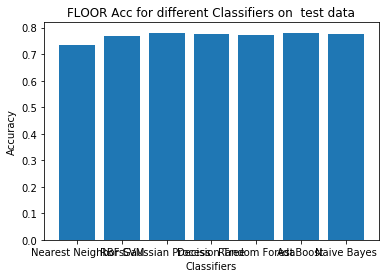

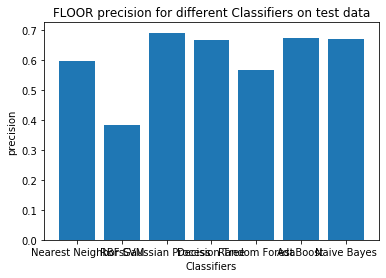

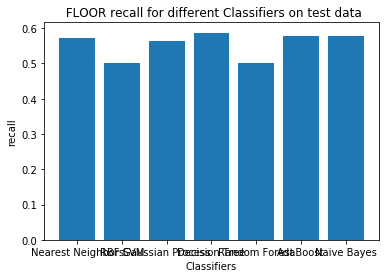

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(train_X, train_Y, test_size=0.4, random_state=0)

for name, clf in zip(names, classifiers):
        #ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        scores=cross_validate(clf, X_train,Y_train, scoring=scoring,cv=5, return_train_score=True)
        scoresAll.append((name,scores))

PlotGraaph(scoresAll,names)

Confusion matrix, without normalization
[[1826  183]
 [ 446  163]]
Normalized confusion matrix
[[0.91 0.09]
 [0.73 0.27]]


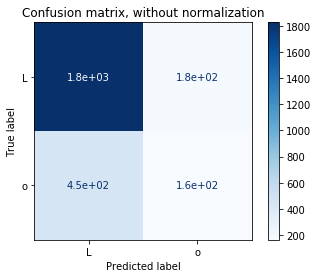

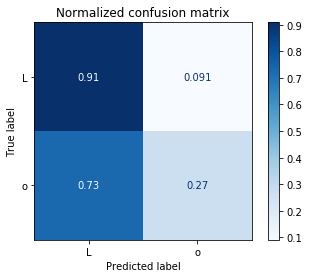

In [30]:
from sklearn.linear_model import LogisticRegression

classifier = RandomForestClassifier(max_depth=75, n_estimators=100, max_features=12).fit(X_train, Y_train)

np.set_printoptions(precision=2)
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]

for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, Y_test,
                                 display_labels="LogisticRegression",
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [33]:
#val_x = sc.fit_transform(test1)
val_y=classifier.predict(test1)
pred_ = list()
for i in range(len(val_y)):
    pred_.append(np.argmax(val_y[i]))
cal_claim=pd.DataFrame({'Customer Id':val_Sub,'Claim':pred_})
cal_claim.to_csv('nnSub.csv',index=False)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').